# Customer Churn Analysis

This notebook is using customer churn data from Kaggle (https://www.kaggle.com/sandipdatta/customer-churn-analysis) and has been adopted from the notebook available on Kaggle developed by SanD.

The notebook will go through the following steps:
    1. Import Dataset
    2. Analyze the Data
    3. Prepare the data model building
    4. Split data in test and train data
    5. Train model using various machine learning algorithms for binary classification
    6. Evaluate the models
    7. Select the model best fit for the given data set
    8. Save and deploy model to Watson Machine Learning

In [85]:
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
import json

## Dataset

The original dataset can be downloaded from https://www.kaggle.com/becksddf/churn-in-telecoms-dataset/data. Then upload it to IBM Watson Studio and insert the code to read the data using "insert to code > Insert panndas DataFrame".

In [251]:
# @hidden cell
# Click the 1001 data icon at the upper part of the page to open the Files subpanel. 
# In the right part of the page, select the Customer Churn .csv data set. Click insert to code, and select Insert pandas DataFrame.
df_data_2 = pd.read_csv('/project_data/data_asset/customer-churn-analysis.csv')
df_data_2.head()
# make sure you assign the dataframe to the variable "df"
df = df_data_2
print (df.shape)

(3333, 21)


Examine the first 5 lines of the input

In [106]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


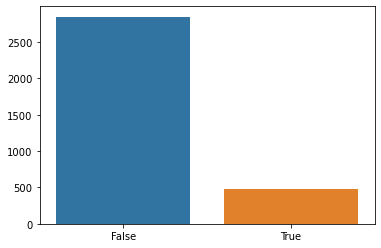

In [5]:
y = df["churn"].value_counts()
sns.barplot(y.index, y.values)

In [6]:
y_True = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 )+"%")

Churn Percentage = 14.491449144914492%


## Descriptive Analysis of the Data

In [7]:
  df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Churn by State 

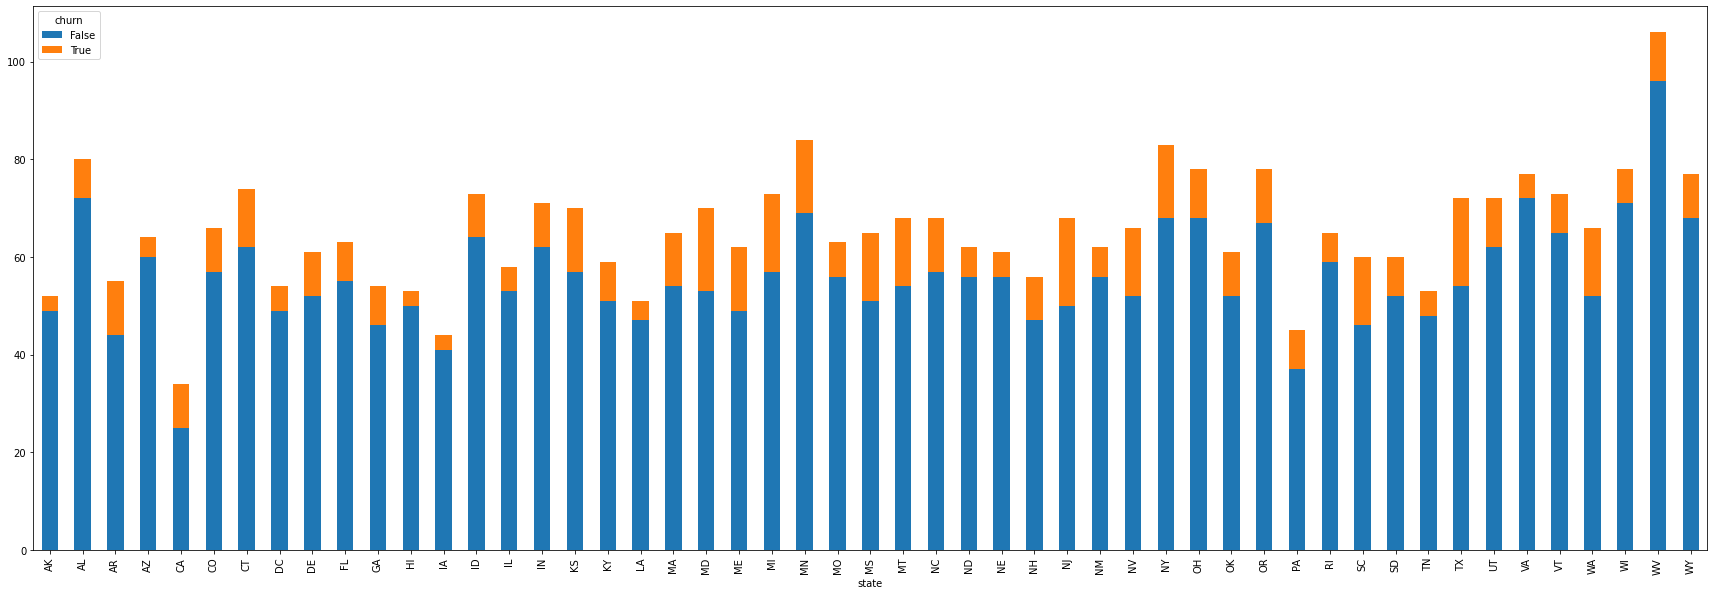

In [8]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

### Churn by Area Code 

In [93]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

KeyError: 'churn'

###  Churn by customers with International Plan 

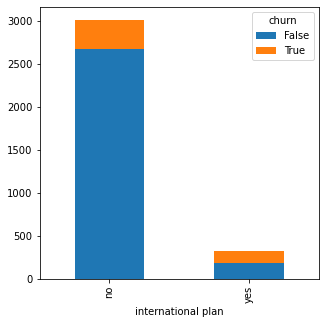

In [10]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn By Customers with Voice mail plan

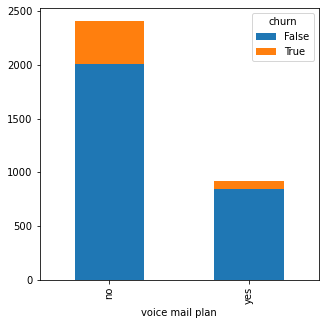

In [11]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

## Data Preparation

The following preprocessing steps need to be done:
1. Turn categorical variables into discrete numerical variables
2. Create response vector
3. Drop superflous columns
4. Build feature matrix
5. Standardize feature matrix values

### Split Train and Test data

In [252]:
y = df['churn'].values.astype(np.int)
# we don't need churn or phone number
#df.drop(["phone number","churn"], axis = 1, inplace=True)
df.drop(["churn"], axis = 1, inplace=True)
X = df.values
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=0,stratify=y)

In [253]:
X_train

array([['CA', 37, 510, ..., 4, 2.4, 2],
       ['GA', 74, 510, ..., 2, 2.67, 4],
       ['IA', 100, 408, ..., 5, 2.54, 4],
       ...,
       ['VA', 104, 415, ..., 3, 3.59, 4],
       ['AL', 107, 408, ..., 3, 3.56, 1],
       ['OH', 29, 408, ..., 7, 3.43, 2]], dtype=object)

In [248]:
X_test

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1216,LA,95,415,411-6294,no,no,0,141.1,84,23.99,211.4,108,17.97,103.7,127,4.67,5.9,6,1.59,3
28,MO,20,415,353-2630,no,no,0,190.0,109,32.30,258.2,84,21.95,181.5,102,8.17,6.3,6,1.70,0
1036,MO,119,408,390-1612,no,yes,32,142.6,77,24.24,208.2,126,17.70,171.0,102,7.69,12.0,2,3.24,3
1197,MO,98,415,354-3237,no,no,0,221.2,80,37.60,213.6,104,18.16,291.8,89,13.13,11.9,3,3.21,4
3141,MA,93,415,368-3287,no,yes,31,237.2,85,40.32,213.1,100,18.11,192.7,87,8.67,10.7,4,2.89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,VA,121,510,339-2792,no,yes,28,110.0,94,18.70,141.5,76,12.03,237.3,87,10.68,6.4,3,1.73,2
2743,DE,90,415,354-9068,no,no,0,198.5,124,33.75,266.6,100,22.66,243.3,80,10.95,8.0,7,2.16,2
396,TX,84,408,339-7139,no,no,0,138.6,102,23.56,199.0,93,16.92,204.1,137,9.18,7.8,4,2.11,0
1934,HI,105,415,401-7359,no,no,0,281.3,124,47.82,301.5,96,25.63,202.8,109,9.13,8.7,3,2.35,0


In [254]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [198]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

### Pipeline

In [249]:
pipeline_trans=Pipeline([('OHE',OneHotEncoder(handle_unknown='ignore')),
                      ('scale',StandardScaler(with_mean=False))])

pipeline_trans.fit_transform(X_train)



<2333x10842 sparse matrix of type '<class 'numpy.float64'>'
	with 46660 stored elements in Compressed Sparse Row format>

In [266]:
from sklearn.compose import ColumnTransformer


transformer = ColumnTransformer(
    [('drop', 'drop', 4)],
     remainder='passthrough')

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

pipeline_lr=Pipeline([('OHE',OneHotEncoder(handle_unknown='ignore')),
                      ('scale',StandardScaler(with_mean=False)),
                      ('t',transformer),
                      ('lr_classifier',LogisticRegression(solver='lbfgs'))])
#pipeline_lr=Pipeline([('t',transformer)])
#pipeline_lr


pipeline_lr.fit(X_train, y_train)
pipeline_lr.score(X_test,y_test)

0.853

In [267]:
# use pipelines to encode and build the model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

pipeline_lr=Pipeline([('OHE',OneHotEncoder(handle_unknown='ignore')),
                      ('scale',StandardScaler(with_mean=False)),
                      ('t',transformer),
                      ('lr_classifier',LogisticRegression(solver='lbfgs'))])

pipeline_gbc=Pipeline([('OHE',OneHotEncoder(handle_unknown='ignore')),
                      ('scale',StandardScaler(with_mean=False)),
                      ('t',transformer),
                      ('gb_classifier',GradientBoostingClassifier())])

pipeline_svc=Pipeline([('OHE',OneHotEncoder(handle_unknown='ignore')),
                      ('scale',StandardScaler(with_mean=False)),
                      ('svc_classifier',SVC(gamma='auto'))])

pipeline_rf=Pipeline([('OHE',OneHotEncoder(handle_unknown='ignore')),
                      ('scale',StandardScaler(with_mean=False)),
                      ('rf_classifier',RandomForestClassifier(n_estimators=10))])

pipeline_kn=Pipeline([('OHE',OneHotEncoder(handle_unknown='ignore')),
                      ('scale',StandardScaler(with_mean=False)),
                      ('kn_classifier',KNeighborsClassifier())])

pipelines = [pipeline_lr, pipeline_gbc, pipeline_svc, pipeline_rf, pipeline_kn]
pipe_dict = {0: 'Logistic Regression', 1: 'GrandientBoosting', 2: 'Support Vector Machine',3: 'Random Forest', 4:'K Nearest Neighbor'}
for pipe in pipelines:
  pipe.fit(X_train, y_train)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))



Logistic Regression Test Accuracy:0.853
GrandientBoosting Test Accuracy:0.88
Support Vector Machine Test Accuracy:0.855
Random Forest Test Accuracy:0.86
K Nearest Neighbor Test Accuracy:0.854


In [205]:
pipeline_gbc.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Model Evaluation

We will now generate confusion matrices for the various models to analyze the prediction in more detail.

### Gradient Boosting Classifier

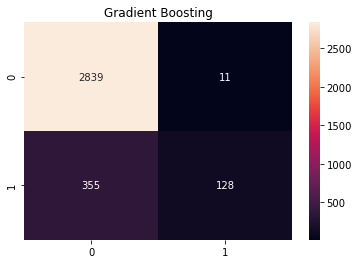

In [209]:
grad_ens_conf_matrix = metrics.confusion_matrix(y, pipeline_gbc.predict(X))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

### Support Vector Machines

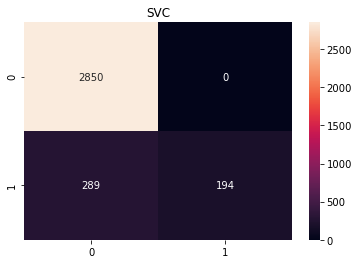

In [211]:
svm_svc_conf_matrix = metrics.confusion_matrix(y, pipeline_svc.predict(X))
sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
title = 'SVC'
plt.title(title);

### Random Forest

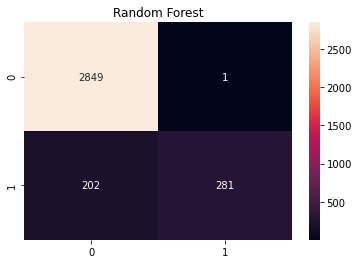

In [212]:
random_forest_conf_matrix = metrics.confusion_matrix(y, pipeline_rf.predict(X))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

### Logistic Regression

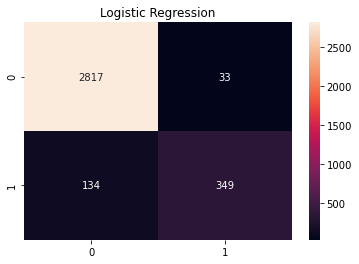

In [213]:
logistic_regression_conf_matrix = metrics.confusion_matrix(y, pipeline_lr.predict(X))
sns.heatmap(logistic_regression_conf_matrix, annot=True,  fmt='');
title = 'Logistic Regression'
plt.title(title);

### Classification Report

In [215]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, pipeline_gbc.predict(X))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, pipeline_svc.predict(X))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, pipeline_rf.predict(X))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      2850
           1       0.92      0.27      0.41       483

    accuracy                           0.89      3333
   macro avg       0.90      0.63      0.68      3333
weighted avg       0.89      0.89      0.86      3333


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      2850
           1       1.00      0.40      0.57       483

    accuracy                           0.91      3333
   macro avg       0.95      0.70      0.76      3333
weighted avg       0.92      0.91      0.90      3333


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      2850
           1       1.00      0.58      0.73       483

    accuracy                           0.94      3333
   macro avg       0.97      0.79     

## Final Model Selection

Gradient Boosting seems to do comparatively better for this case

## Save and Deploy model to Watson Machine Learning

In [218]:
# Provide your credentials
# If your WML service is deployed in US-South use the URL https://us-south.ml.cloud.ibm.com
# To generate a new API Key go to https://cloud.ibm.com/iam/apikeys and create one

from ibm_watson_machine_learning import APIClient

#wml_credentials = {
#  "url": "https://zen-cpd-zen.ttacloudpakibmcluster-7c6511cbef454b73861c1e734bd972dd-0000.eu-de.containers.appdomain.cloud",
#  "instance_id": "wml_local",
#  "apikey": "rI0UrDt8Rdd5PyLTfbd6Lg9E02F32bWXsAT8gK6N"
#}

wml_credentials = {
  "url": "https://zen-cpd-zen.ttacloudpakibmcluster-7c6511cbef454b73861c1e734bd972dd-0000.eu-de.containers.appdomain.cloud/",
  "instance_id": "wml_local",
  "username": "marc.bastien@timetoact.de",
  "password": "wlHdm18AOskQMoksRXcf",
  "version": "3.5"
}

#wml_credentials = {
#                   "url": "https://us-south.ml.cloud.ibm.com",
#                   "apikey":"rI0UrDt8Rdd5PyLTfbd6Lg9E02F32bWXsAT8gK6N"
#                  }

client = APIClient(wml_credentials)
print(client.version)

1.0.34


2021-01-04 15:37:01,552 - ibm_watson_machine_learning.wml_client_error - WARNING - Failure during scoring. (POST https://zen-cpd-zen.ttacloudpakibmcluster-7c6511cbef454b73861c1e734bd972dd-0000.eu-de.containers.appdomain.cloud/ml/v4/deployments/8cb159d1-05cd-4991-9278-bbdadb2170d3/predictions?version=2020-08-01)
Status code: 400, body: {"trace": "793c6d1ed7bdbdf46f77ffc852d8cc60", "errors": [{"code": "score_processing_failure", "message": "The number of features in X is different to the number of features of the fitted data. The fitted data had 19 features and the X has 21 features."}], "status_code": 400}

2021-01-04 16:27:46,440 - ibm_watson_machine_learning.wml_client_error - WARNING - Failure during scoring. (POST https://zen-cpd-zen.ttacloudpakibmcluster-7c6511cbef454b73861c1e734bd972dd-0000.eu-de.containers.appdomain.cloud/ml/v4/deployments/628beae3-ad8c-4928-8beb-67043c80976f/predictions?version=2020-08-01)
Status code: 400, body: {"trace": "70446ea7d1d97d6410db5a818c716e34", "er

In [219]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.7 MB 11.8 MB/s eta 0:00:01              | 440 kB 11.8 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.34
    Uninstalling ibm-watson-machine-learning-1.0.34:
      Successfully uninstalled ibm-watson-machine-learning-1.0.34


Working with spaces:

First of all, you need to create a space that will be used for your work. If you do not have space already created, you can use <a href="https://dataplatform.cloud.ibm.com/ml-runtime/spaces?context=cpdaas" target="_blank">Deployment Spaces Dashboard</a> to create one.

    - Click New Deployment Space
    - Create an empty space
    - Select Cloud Object Storage
    - Select Watson Machine Learning instance and press Create
    - Copy space_id and paste it below, you will find it in your (Deployment Space)-URL, it will look like this: "1234a1b-cd5e-6fg7-8hi9-11jkl2mno34p"
    
Working with projects:

    - Go to your project, you can reach it from your Cloud Pak for Data as a Service Overview Page
    - Copy project_id and paste it below, you will find it in your (Project)-URL, it will look like this: "1234a1b-cd5e-6fg7-8hi9-11jkl2mno34p"


In [268]:
# project id and space id
# both can be found in the URL
#project_id = ""
#client.set.default_project(project_id)

# deployment space
space_id = "aecbd34f-3040-409b-92f1-955f37162d44"
client.set.default_space(space_id)

# Use this cell to do any cleanup of previously created models and deployments
client.repository.list_models()
client.deployments.list()
client.spaces.list(limit=10)

#client.repository.delete('GUID of stored model')
#client.deployments.delete('GUID of deployed model')

------------------------------------  -----------------------  ------------------------  -----------------
ID                                    NAME                     CREATED                   TYPE
befdc328-8368-42c5-8493-bd8213f6f2dd  GBC Pipeline Model       2021-01-04T15:31:58.002Z  scikit-learn_0.23
37206f6d-7c50-4599-b963-713a00565b66  GBC model Test Database  2020-12-29T16:06:58.002Z  scikit-learn_0.23
cf991f66-a07b-47c4-a59c-8b06cc768eb6  SPSS Churn Result Table  2020-12-28T13:33:51.002Z  spss-modeler_18.2
e44d755d-0e2b-4d42-86ff-56184b1c41bc  GBC model                2020-12-21T16:20:36.002Z  scikit-learn_0.23
------------------------------------  -----------------------  ------------------------  -----------------
------------------------------------  ---------------------------------------------------  -----  ------------------------
GUID                                  NAME                                                 STATE  CREATED
8cb159d1-05cd-4991-9278-bbdadb2170d

In [269]:
sofware_spec_uid = client.software_specifications.get_id_by_name("default_py3.7")

# store the model in WML
metadata={
    client.repository.ModelMetaNames.NAME: "GBC Pipeline Model 2",
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}
published_model = client.repository.store_model(
    model=pipeline_gbc,
    meta_props=metadata,
    training_data=X, training_target=y
)


In [270]:
# new list of models
client.repository.list_models()

# get UID of our just stored model
model_uid = client.repository.get_model_uid(published_model)
print("Model id: {}".format(model_uid))

------------------------------------  -----------------------  ------------------------  -----------------
ID                                    NAME                     CREATED                   TYPE
dec83279-58d5-466b-9241-1275c6f24898  GBC Pipeline Model 2     2021-01-04T16:27:11.002Z  scikit-learn_0.23
befdc328-8368-42c5-8493-bd8213f6f2dd  GBC Pipeline Model       2021-01-04T15:31:58.002Z  scikit-learn_0.23
37206f6d-7c50-4599-b963-713a00565b66  GBC model Test Database  2020-12-29T16:06:58.002Z  scikit-learn_0.23
cf991f66-a07b-47c4-a59c-8b06cc768eb6  SPSS Churn Result Table  2020-12-28T13:33:51.002Z  spss-modeler_18.2
e44d755d-0e2b-4d42-86ff-56184b1c41bc  GBC model                2020-12-21T16:20:36.002Z  scikit-learn_0.23
------------------------------------  -----------------------  ------------------------  -----------------
Model id: dec83279-58d5-466b-9241-1275c6f24898


In [271]:
# create deployment
#created_deployment = client.deployments.create(model_uid, name="GBC model deployment")

# new list of deployments
#client.deployments.list()

# get UID of our new deployment
#deployment_uid = client.deployments.get_uid(created_deployment)
#print("Deployment id: {}".format(deployment_uid))
#print(created_deployment)


metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "GBC Pipeline model 2 deployment",
    # client.deployments.ConfigurationMetaNames.VIRTUAL: {"export_format": "coreml"},
    client.deployments.ConfigurationMetaNames.ONLINE:{}
}

created_deployment = client.deployments.create(model_uid, meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: 'dec83279-58d5-466b-9241-1275c6f24898' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='628beae3-ad8c-4928-8beb-67043c80976f'
------------------------------------------------------------------------------------------------




In [276]:
# test your model with some test data

space_id = "aecbd34f-3040-409b-92f1-955f37162d44"
client.set.default_space(space_id)
deployment_id = client.deployments.get_id(created_deployment)

scoring_data = {
    client.deployments.ScoringMetaNames.INPUT_DATA: [
        {
            'fields': ['state','account length','area code','phone number','international plan','voice mail plan','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls'], 
            'values': [['KS',128,415,'382-4657','no','yes',25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1]]
        }]
}

predictions = client.deployments.score(deployment_id, scoring_data)
print("The Prediction output regarding customer churn will be displayed in this format 1 for True or 0 for False: \n ", predictions)

The Prediction output regarding customer churn will be displayed in this format 1 for True or 0 for False: 
  {'predictions': [{'fields': ['prediction', 'probability'], 'values': [[0, [0.9378239779530055, 0.062176022046994496]]]}]}


## Acknowledgement

The approach and code fragments have been adopted from the nootebook on Kaggle by Sandip Datta (https://www.kaggle.com/sandipdatta). 
The full original notebook can be viewed here: https://www.kaggle.com/sandipdatta/customer-churn-analysis#